<a href="https://colab.research.google.com/github/VindiSovia/Analisis_Sentimen/blob/main/Proses_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk
!pip install kbbi
!pip install Sastrawi
!pip install emoji

import pandas as pd
import re
import string

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 8.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bkl_gps = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/GOOGLE PLAY/BukalapakGPS.csv")
lzd_gps = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/GOOGLE PLAY/LazadaGPS.csv")
shp_gps = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/GOOGLE PLAY/ShopeeGPS.csv")
tkp_gps = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/GOOGLE PLAY/TokopediaGPS.csv")

In [ ]:
bkl_app = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/PS_APP/BukalapakAPST.csv")
lzd_app = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/PS_APP/LazadaAPST.csv")
shp_app = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/PS_APP/ShopeeAPST.csv")
tkp_app = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/PS_APP/TokopediaAPST.csv")

In [3]:
shp_twt = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/TWT/ofc_shopee.csv")

In [4]:
shp_twt.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Thu Apr 04 16:16:12 +0000 2024,1775920314410746355,@ivanckak iya nih seru banget lho flash sale s...,0,0,0,0,in,972383839833108481,1775906247063294331,mikrotin,https://twitter.com/mikrotin/status/1775920314...
1,Thu Apr 04 16:16:11 +0000 2024,1775920310526873973,cukup di liat aja ya pls jangan beli,0,0,0,0,in,1688008913827008512,1775920310526873973,justkaei,https://twitter.com/justkaei/status/1775920310...
2,Thu Apr 04 16:16:08 +0000 2024,1775920298338005412,comprei um monte de bobagem na shopee incluind...,0,0,0,0,pt,1681655314104369152,1775920298338005412,jellilubi,https://twitter.com/jellilubi/status/177592029...
3,Thu Apr 04 16:16:08 +0000 2024,1775920298379919666,COMPREI 7 PINS ESMALTADOS POR 20 REAIS NA SHOP...,0,0,0,0,pt,1357880496294944768,1775920298379919666,szamofada,https://twitter.com/szamofada/status/177592029...
4,Thu Apr 04 16:16:08 +0000 2024,1775920297692311902,@ivanckak gue aja udah dari tadi nungguin flas...,0,0,0,0,in,1593217019872038913,1775906247063294331,xcherisee,https://twitter.com/xcherisee/status/177592029...


In [5]:
print(shp_twt.columns)

Index(['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url'],
      dtype='object')


In [6]:
new_df = shp_twt[['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url']]
sorted_df = new_df.sort_values(by='created_at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Thu Apr 04 16:16:12 +0000 2024,1775920314410746355,@ivanckak iya nih seru banget lho flash sale s...,0,0,0,0,in,972383839833108481,1775906247063294331,mikrotin,https://twitter.com/mikrotin/status/1775920314...
1,Thu Apr 04 16:16:11 +0000 2024,1775920310526873973,cukup di liat aja ya pls jangan beli,0,0,0,0,in,1688008913827008512,1775920310526873973,justkaei,https://twitter.com/justkaei/status/1775920310...
2,Thu Apr 04 16:16:08 +0000 2024,1775920298338005412,comprei um monte de bobagem na shopee incluind...,0,0,0,0,pt,1681655314104369152,1775920298338005412,jellilubi,https://twitter.com/jellilubi/status/177592029...
3,Thu Apr 04 16:16:08 +0000 2024,1775920298379919666,COMPREI 7 PINS ESMALTADOS POR 20 REAIS NA SHOP...,0,0,0,0,pt,1357880496294944768,1775920298379919666,szamofada,https://twitter.com/szamofada/status/177592029...
4,Thu Apr 04 16:16:08 +0000 2024,1775920297692311902,@ivanckak gue aja udah dari tadi nungguin flas...,0,0,0,0,in,1593217019872038913,1775906247063294331,xcherisee,https://twitter.com/xcherisee/status/177592029...


In [7]:
my_df = sorted_df[['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url']]

In [8]:
my_df=my_df[['full_text']]

In [9]:
my_df = my_df.dropna(axis=1)

In [10]:
my_df.head()

,full_text
0,@ivanckak iya nih seru banget lho flash sale s...
1,cukup di liat aja ya pls jangan beli
2,comprei um monte de bobagem na shopee incluind...
3,COMPREI 7 PINS ESMALTADOS POR 20 REAIS NA SHOP...
4,@ivanckak gue aja udah dari tadi nungguin flas...


# **Casefolding**

In [11]:
df = my_df

In [ ]:
df = df.drop('created_at', axis=1)
df = df.drop('id_str', axis=1)
df = df.drop('quote_count', axis=1)
df = df.drop('reply_count', axis=1)
df = df.drop('retweet_count', axis=1)
df = df.drop('lang', axis=1)
df = df.drop('user_id_str', axis=1)
df = df.drop('conversation_id_str', axis=1)
df = df.drop('username', axis=1)
df = df.drop('tweet_url', axis=1)
df = df.dropna(axis=1)

In [13]:
df = df.dropna(axis=1)

In [14]:
df.head()

,full_text
0,@ivanckak iya nih seru banget lho flash sale s...
1,cukup di liat aja ya pls jangan beli
2,comprei um monte de bobagem na shopee incluind...
3,COMPREI 7 PINS ESMALTADOS POR 20 REAIS NA SHOP...
4,@ivanckak gue aja udah dari tadi nungguin flas...


In [15]:
df.shape

(507, 1)

In [ ]:
df = df.drop('favorite_count', axis=1)

In [12]:
df.shape

(507, 1)

# **CLEANSING**

In [13]:
import emoji

def preprocess_text(kalimat):
  # Mengubah kalimat menjadi huruf kecil
  lower_case = kalimat.lower()

  # Menghapus angka dari kalimat
  hasil = re.sub(r"\d+", "", lower_case)

  # Menghapus tanda baca dari kalimat
  hasil = hasil.translate(str.maketrans("", "", string.punctuation))

  # Menghapus emoji dari kalimat
  hasil = emoji.replace_emoji(hasil, replace="")

  # Menghapus spasi pada awal dan akhir kalimat
  hasil = hasil.strip()

  # Menghapus `@`, `HTTP`, dan `HTTPS`
  hasil = re.sub(r"(^@\w+)|(http(s)?:\/\S+)", "", hasil)

  return hasil

In [14]:
df['text_clean'] = df['full_text'].apply(preprocess_text)
df.head()

,full_text,text_clean
0,@ivanckak iya nih seru banget lho flash sale s...,ivanckak iya nih seru banget lho flash sale sh...
1,cukup di liat aja ya pls jangan beli,cukup di liat aja ya pls jangan beli
2,comprei um monte de bobagem na shopee incluind...,comprei um monte de bobagem na shopee incluind...
3,COMPREI 7 PINS ESMALTADOS POR 20 REAIS NA SHOP...,comprei pins esmaltados por reais na shopee ...
4,@ivanckak gue aja udah dari tadi nungguin flas...,ivanckak gue aja udah dari tadi nungguin flash...


In [15]:
# Kamus singkatan ke kata baku
kamus_singkatan = {
    "yg": "yang",
    "kurleb": "kurang lebih",
    "udh": "udah",
    "gak": "tidak",
    "ga": "tidak",
    "skrg": "sekarang",
    "bgt": "banget",
    "krn": "karena",
    "th": "tahun",
    "kyk": "kayak",
    "jd": "jadi",
    "tp": "tapi",
    # Tambahkan singkatan dan kata baku lainnya sesuai kebutuhan
}

def benarkan_singkatan(teks, kamus):
    kata_kunci = teks.split()  # Membagi teks menjadi kata-kata
    teks_benar = []
    for kata in kata_kunci:
        teks_benar.append(kamus.get(kata, kata))  # Mengganti kata singkatan jika ada dalam kamus
    return " ".join(teks_benar)  # Menggabungkan kembali kata-kata menjadi teks


In [16]:
# Terapkan fungsi benarkan_singkatan ke setiap entri dalam kolom 'text_clean'
df['baku'] = df['text_clean'].apply(benarkan_singkatan, kamus=kamus_singkatan)
df.head()

,full_text,text_clean,baku
0,@ivanckak iya nih seru banget lho flash sale s...,ivanckak iya nih seru banget lho flash sale sh...,ivanckak iya nih seru banget lho flash sale sh...
1,cukup di liat aja ya pls jangan beli,cukup di liat aja ya pls jangan beli,cukup di liat aja ya pls jangan beli
2,comprei um monte de bobagem na shopee incluind...,comprei um monte de bobagem na shopee incluind...,comprei um monte de bobagem na shopee incluind...
3,COMPREI 7 PINS ESMALTADOS POR 20 REAIS NA SHOP...,comprei pins esmaltados por reais na shopee ...,comprei pins esmaltados por reais na shopee ht...
4,@ivanckak gue aja udah dari tadi nungguin flas...,ivanckak gue aja udah dari tadi nungguin flash...,ivanckak gue aja udah dari tadi nungguin flash...


# **Tokenizing**

In [17]:
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [18]:
def tokenize_text(kalimat):
  tokens = nltk.tokenize.word_tokenize(kalimat)
  return tokens

In [19]:
df['token'] = df['baku'].apply(tokenize_text)
df.head()

,full_text,text_clean,baku,token
0,@ivanckak iya nih seru banget lho flash sale s...,ivanckak iya nih seru banget lho flash sale sh...,ivanckak iya nih seru banget lho flash sale sh...,"[ivanckak, iya, nih, seru, banget, lho, flash,..."
1,cukup di liat aja ya pls jangan beli,cukup di liat aja ya pls jangan beli,cukup di liat aja ya pls jangan beli,"[cukup, di, liat, aja, ya, pls, jangan, beli]"
2,comprei um monte de bobagem na shopee incluind...,comprei um monte de bobagem na shopee incluind...,comprei um monte de bobagem na shopee incluind...,"[comprei, um, monte, de, bobagem, na, shopee, ..."
3,COMPREI 7 PINS ESMALTADOS POR 20 REAIS NA SHOP...,comprei pins esmaltados por reais na shopee ...,comprei pins esmaltados por reais na shopee ht...,"[comprei, pins, esmaltados, por, reais, na, sh..."
4,@ivanckak gue aja udah dari tadi nungguin flas...,ivanckak gue aja udah dari tadi nungguin flash...,ivanckak gue aja udah dari tadi nungguin flash...,"[ivanckak, gue, aja, udah, dari, tadi, nunggui..."


# **Filtering (Stopword Removal)**

In [20]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [21]:
def stopwords_text(tokens):
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords:
      cleaned_tokens.append(token)
  return cleaned_tokens

In [22]:
df['stop'] = df['token'].apply(stopwords_text)
df.head()

,full_text,text_clean,baku,token,stop
0,@ivanckak iya nih seru banget lho flash sale s...,ivanckak iya nih seru banget lho flash sale sh...,ivanckak iya nih seru banget lho flash sale sh...,"[ivanckak, iya, nih, seru, banget, lho, flash,...","[ivanckak, iya, nih, seru, banget, lho, flash,..."
1,cukup di liat aja ya pls jangan beli,cukup di liat aja ya pls jangan beli,cukup di liat aja ya pls jangan beli,"[cukup, di, liat, aja, ya, pls, jangan, beli]","[cukup, liat, aja, pls, jangan, beli]"
2,comprei um monte de bobagem na shopee incluind...,comprei um monte de bobagem na shopee incluind...,comprei um monte de bobagem na shopee incluind...,"[comprei, um, monte, de, bobagem, na, shopee, ...","[comprei, um, monte, de, bobagem, na, shopee, ..."
3,COMPREI 7 PINS ESMALTADOS POR 20 REAIS NA SHOP...,comprei pins esmaltados por reais na shopee ...,comprei pins esmaltados por reais na shopee ht...,"[comprei, pins, esmaltados, por, reais, na, sh...","[comprei, pins, esmaltados, por, reais, na, sh..."
4,@ivanckak gue aja udah dari tadi nungguin flas...,ivanckak gue aja udah dari tadi nungguin flash...,ivanckak gue aja udah dari tadi nungguin flash...,"[ivanckak, gue, aja, udah, dari, tadi, nunggui...","[ivanckak, gue, aja, udah, tadi, nungguin, fla..."


# **Stemming**

In [23]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Instantiate StemmerFactory
stem_factory = StemmerFactory()

# Create stemmer
stemmer = stem_factory.create_stemmer()

In [24]:
def stemming_text(tokens):
  hasil = [stemmer.stem(token) for token in tokens]
  return hasil

In [25]:
df['stemmed'] = df['stop'].apply(stemming_text)
df.head()

,full_text,text_clean,baku,token,stop,stemmed
0,@ivanckak iya nih seru banget lho flash sale s...,ivanckak iya nih seru banget lho flash sale sh...,ivanckak iya nih seru banget lho flash sale sh...,"[ivanckak, iya, nih, seru, banget, lho, flash,...","[ivanckak, iya, nih, seru, banget, lho, flash,...","[ivanckak, iya, nih, seru, banget, lho, flash,..."
1,cukup di liat aja ya pls jangan beli,cukup di liat aja ya pls jangan beli,cukup di liat aja ya pls jangan beli,"[cukup, di, liat, aja, ya, pls, jangan, beli]","[cukup, liat, aja, pls, jangan, beli]","[cukup, liat, aja, pls, jangan, beli]"
2,comprei um monte de bobagem na shopee incluind...,comprei um monte de bobagem na shopee incluind...,comprei um monte de bobagem na shopee incluind...,"[comprei, um, monte, de, bobagem, na, shopee, ...","[comprei, um, monte, de, bobagem, na, shopee, ...","[comprei, um, monte, de, bobagem, na, shopee, ..."
3,COMPREI 7 PINS ESMALTADOS POR 20 REAIS NA SHOP...,comprei pins esmaltados por reais na shopee ...,comprei pins esmaltados por reais na shopee ht...,"[comprei, pins, esmaltados, por, reais, na, sh...","[comprei, pins, esmaltados, por, reais, na, sh...","[comprei, pins, esmaltados, por, reais, na, sh..."
4,@ivanckak gue aja udah dari tadi nungguin flas...,ivanckak gue aja udah dari tadi nungguin flash...,ivanckak gue aja udah dari tadi nungguin flash...,"[ivanckak, gue, aja, udah, dari, tadi, nunggui...","[ivanckak, gue, aja, udah, tadi, nungguin, fla...","[ivanckak, gue, aja, udah, tadi, nungguin, fla..."


In [26]:
df['text_string'] = df['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>3]))
df.head()

,full_text,text_clean,baku,token,stop,stemmed,text_string
0,@ivanckak iya nih seru banget lho flash sale s...,ivanckak iya nih seru banget lho flash sale sh...,ivanckak iya nih seru banget lho flash sale sh...,"[ivanckak, iya, nih, seru, banget, lho, flash,...","[ivanckak, iya, nih, seru, banget, lho, flash,...","[ivanckak, iya, nih, seru, banget, lho, flash,...",ivanckak seru banget flash sale shopee live ma...
1,cukup di liat aja ya pls jangan beli,cukup di liat aja ya pls jangan beli,cukup di liat aja ya pls jangan beli,"[cukup, di, liat, aja, ya, pls, jangan, beli]","[cukup, liat, aja, pls, jangan, beli]","[cukup, liat, aja, pls, jangan, beli]",cukup liat jangan beli
2,comprei um monte de bobagem na shopee incluind...,comprei um monte de bobagem na shopee incluind...,comprei um monte de bobagem na shopee incluind...,"[comprei, um, monte, de, bobagem, na, shopee, ...","[comprei, um, monte, de, bobagem, na, shopee, ...","[comprei, um, monte, de, bobagem, na, shopee, ...",comprei monte bobagem shopee incluindo chaveir...
3,COMPREI 7 PINS ESMALTADOS POR 20 REAIS NA SHOP...,comprei pins esmaltados por reais na shopee ...,comprei pins esmaltados por reais na shopee ht...,"[comprei, pins, esmaltados, por, reais, na, sh...","[comprei, pins, esmaltados, por, reais, na, sh...","[comprei, pins, esmaltados, por, reais, na, sh...",comprei pins esmaltados reais shopee httpstcop...
4,@ivanckak gue aja udah dari tadi nungguin flas...,ivanckak gue aja udah dari tadi nungguin flash...,ivanckak gue aja udah dari tadi nungguin flash...,"[ivanckak, gue, aja, udah, dari, tadi, nunggui...","[ivanckak, gue, aja, udah, tadi, nungguin, fla...","[ivanckak, gue, aja, udah, tadi, nungguin, fla...",ivanckak udah tadi nungguin flash sale shopee ...


## **LABELING**

In [27]:
!pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

import pandas as pd

nltk.download("vader_lexicon")
nltk.download("punkt")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
data = SentimentIntensityAnalyzer()

labels = []
scores = []

for text in df['text_string']:
  sentiment_score = data.polarity_scores(text)
  compound_score = sentiment_score['compound']

  scores.append(compound_score)

  if compound_score > 0:
    label = 'positif'
  elif compound_score < 0:
      label = 'negatif'
  else:
    label = 'netral'

  labels.append(label)

my_df['sentiment_score'] = scores
my_df['sentiment'] = labels

data = ['full_text', 'sentiment_score', 'sentiment']
data = my_df[data]

data.head(20)

,full_text,sentiment_score,sentiment
0,@ivanckak iya nih seru banget lho flash sale s...,0.0000,netral
1,cukup di liat aja ya pls jangan beli,0.0000,netral
2,comprei um monte de bobagem na shopee incluind...,0.0000,netral
3,COMPREI 7 PINS ESMALTADOS POR 20 REAIS NA SHOP...,0.0000,netral
4,@ivanckak gue aja udah dari tadi nungguin flas...,0.0000,netral
5,Vai sair cupom shopee de frete grátis em compr...,0.0000,netral
7,@araujowsz real ou shopee?,0.0000,netral
6,👉COMPRE AQUI:https://t.co/YHqZ2JpQst ⚠️Sujeit...,0.0000,netral
8,Sticker cermin Link Shopee :📍https://t.co/2i7g...,0.0000,netral
9,🚨Produtos coreanos!! Confira ahc natural perfe...,0.7351,positif


In [34]:
import numpy as np

# Mengganti nilai 'Netral' menjadi NaN menggunakan metode replace
df['sentiment'].replace('netral', np.nan, inplace=True)

In [35]:
df.head(50)

,full_text,text_clean,baku,token,stop,stemmed,text_string,sentiment_score,sentiment
0,@ivanckak iya nih seru banget lho flash sale s...,ivanckak iya nih seru banget lho flash sale sh...,ivanckak iya nih seru banget lho flash sale sh...,"[ivanckak, iya, nih, seru, banget, lho, flash,...","[ivanckak, iya, nih, seru, banget, lho, flash,...","[ivanckak, iya, nih, seru, banget, lho, flash,...",ivanckak seru banget flash sale shopee live ma...,0.0000,NaN
1,cukup di liat aja ya pls jangan beli,cukup di liat aja ya pls jangan beli,cukup di liat aja ya pls jangan beli,"[cukup, di, liat, aja, ya, pls, jangan, beli]","[cukup, liat, aja, pls, jangan, beli]","[cukup, liat, aja, pls, jangan, beli]",cukup liat jangan beli,0.0000,NaN
2,comprei um monte de bobagem na shopee incluind...,comprei um monte de bobagem na shopee incluind...,comprei um monte de bobagem na shopee incluind...,"[comprei, um, monte, de, bobagem, na, shopee, ...","[comprei, um, monte, de, bobagem, na, shopee, ...","[comprei, um, monte, de, bobagem, na, shopee, ...",comprei monte bobagem shopee incluindo chaveir...,0.0000,NaN
3,COMPREI 7 PINS ESMALTADOS POR 20 REAIS NA SHOP...,comprei pins esmaltados por reais na shopee ...,comprei pins esmaltados por reais na shopee ht...,"[comprei, pins, esmaltados, por, reais, na, sh...","[comprei, pins, esmaltados, por, reais, na, sh...","[comprei, pins, esmaltados, por, reais, na, sh...",comprei pins esmaltados reais shopee httpstcop...,0.0000,NaN
4,@ivanckak gue aja udah dari tadi nungguin flas...,ivanckak gue aja udah dari tadi nungguin flash...,ivanckak gue aja udah dari tadi nungguin flash...,"[ivanckak, gue, aja, udah, dari, tadi, nunggui...","[ivanckak, gue, aja, udah, tadi, nungguin, fla...","[ivanckak, gue, aja, udah, tadi, nungguin, fla...",ivanckak udah tadi nungguin flash sale shopee ...,0.0000,NaN
5,Vai sair cupom shopee de frete grátis em compr...,vai sair cupom shopee de frete grátis em compr...,vai sair cupom shopee de frete grátis em compr...,"[vai, sair, cupom, shopee, de, frete, grátis, ...","[vai, sair, cupom, shopee, de, frete, grátis, ...","[vai, sair, cupom, shopee, de, frete, gr tis, ...",sair cupom shopee frete gr tis compras acima l...,0.0000,NaN
7,@araujowsz real ou shopee?,araujowsz real ou shopee,araujowsz real ou shopee,"[araujowsz, real, ou, shopee]","[araujowsz, real, ou, shopee]","[araujowsz, real, ou, shopee]",araujowsz real shopee,0.0000,NaN
6,👉COMPRE AQUI:https://t.co/YHqZ2JpQst ⚠️Sujeit...,compre aquihttpstcoyhqzjpqst sujeito a variaç...,compre aquihttpstcoyhqzjpqst sujeito a variaçã...,"[compre, aquihttpstcoyhqzjpqst, sujeito, a, va...","[compre, aquihttpstcoyhqzjpqst, sujeito, a, va...","[compre, aquihttpstcoyhqzjpqst, sujeito, a, va...",compre aquihttpstcoyhqzjpqst sujeito varia o p...,0.0000,NaN
8,Sticker cermin Link Shopee :📍https://t.co/2i7g...,sticker cermin link shopee httpstcoigpqtos htt...,sticker cermin link shopee httpstcoigpqtos htt...,"[sticker, cermin, link, shopee, httpstcoigpqto...","[sticker, cermin, link, shopee, httpstcoigpqto...","[sticker, cermin, link, shopee, httpstcoigpqto...",sticker cermin link shopee httpstcoigpqtos htt...,0.0000,NaN
9,🚨Produtos coreanos!! Confira ahc natural perfe...,produtos coreanos confira ahc natural perfecti...,produtos coreanos confira ahc natural perfecti...,"[produtos, coreanos, confira, ahc, natural, pe...","[produtos, coreanos, confira, ahc, natural, pe...","[produtos, coreanos, confira, ahc, natural, pe...",produtos coreanos confira natural perfection d...,0.7351,positif


In [36]:
df.isna()

,full_text,text_clean,baku,token,stop,stemmed,text_string,sentiment_score,sentiment
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
502,False,False,False,False,False,False,False,False,True
503,False,False,False,False,False,False,False,False,True
504,False,False,False,False,False,False,False,False,True
505,False,False,False,False,False,False,False,False,True


In [37]:
df.dropna(subset=['sentiment'],inplace = True)

In [38]:
df.isnull().sum()

full_text          0
text_clean         0
baku               0
token              0
stop               0
stemmed            0
text_string        0
sentiment_score    0
sentiment          0
dtype: int64

In [39]:
df.head(50)

,full_text,text_clean,baku,token,stop,stemmed,text_string,sentiment_score,sentiment
9,🚨Produtos coreanos!! Confira ahc natural perfe...,produtos coreanos confira ahc natural perfecti...,produtos coreanos confira ahc natural perfecti...,"[produtos, coreanos, confira, ahc, natural, pe...","[produtos, coreanos, confira, ahc, natural, pe...","[produtos, coreanos, confira, ahc, natural, pe...",produtos coreanos confira natural perfection d...,0.7351,positif
10,puro beads 😭 mag b-business kasi kami ng mga k...,puro beads mag bbusiness kasi kami ng mga kak...,puro beads mag bbusiness kasi kami ng mga kakl...,"[puro, beads, mag, bbusiness, kasi, kami, ng, ...","[puro, beads, mag, bbusiness, kasi, ng, mga, k...","[puro, beads, mag, bbusiness, kasi, ng, mga, k...",puro beads bbusiness kasi kaklase dami naming ...,0.6369,positif
14,Help water my plant on Shopee Farm! Plant your...,help water my plant on shopee farm plant your ...,help water my plant on shopee farm plant your ...,"[help, water, my, plant, on, shopee, farm, pla...","[help, water, my, plant, on, shopee, farm, pla...","[help, water, my, plant, on, shopee, farm, pla...",help water plant shopee farm plant your free s...,0.8442,positif
17,Temukan SPECIAL BUNDLE 6in1 The Originote KIT ...,temukan special bundle in the originote kit fa...,temukan special bundle in the originote kit fa...,"[temukan, special, bundle, in, the, originote,...","[temukan, special, bundle, in, the, originote,...","[temu, special, bundle, in, the, originote, ki...",temu special bundle originote facial wash tone...,0.5267,positif
19,(Pre-Order) NCT DREAM - Dream()Scape Zone Offi...,preorder nct dream dreamscape zone official s...,preorder nct dream dreamscape zone official st...,"[preorder, nct, dream, dreamscape, zone, offic...","[preorder, nct, dream, dreamscape, zone, offic...","[preorder, nct, dream, dreamscape, zone, offic...",preorder dream dreamscape zone official dirty ...,0.3400,positif
22,I'm so strong for not going on shopee for the ...,im so strong for not going on shopee for the p...,im so strong for not going on shopee for the p...,"[im, so, strong, for, not, going, on, shopee, ...","[im, so, strong, for, not, going, on, shopee, ...","[im, so, strong, for, not, going, on, shopee, ...",strong going shopee past month money went drinks,0.5106,positif
24,lembrando de quando tive coragem de puxar papo...,lembrando de quando tive coragem de puxar papo...,lembrando de quando tive coragem de puxar papo...,"[lembrando, de, quando, tive, coragem, de, pux...","[lembrando, de, quando, tive, coragem, de, pux...","[lembrando, de, quando, tive, coragem, de, pux...",lembrando quando tive coragem puxar papo pedir...,-0.1531,negatif
36,open jastip sv SHOPEE VIDEO FREE boleh replink...,open jastip sv shopee video free boleh replink...,open jastip sv shopee video free boleh replink...,"[open, jastip, sv, shopee, video, free, boleh,...","[open, jastip, sv, shopee, video, free, replin...","[open, jastip, sv, shopee, video, free, replin...",open jastip shopee video free replink langsung...,0.5106,positif
45,Temukan SOME BY MI Yuja Niacin Brightening 4 S...,temukan some by mi yuja niacin brightening st...,temukan some by mi yuja niacin brightening ste...,"[temukan, some, by, mi, yuja, niacin, brighten...","[temukan, some, by, mi, yuja, niacin, brighten...","[temu, some, by, mi, yuja, niacin, brightening...",temu some yuja niacin brightening step harga d...,0.5423,positif
49,[🚨] - CUPONS DA SHOPEE LIBERADOS. Garanta o s...,cupons da shopee liberados garanta o seu álbu...,cupons da shopee liberados garanta o seu álbum...,"[cupons, da, shopee, liberados, garanta, o, se...","[cupons, da, shopee, liberados, garanta, o, se...","[cupons, da, shopee, liberados, garanta, o, se...",cupons shopee liberados garanta lbum hope stre...,0.4404,positif


In [40]:
df.shape

(88, 9)

# **Hasil steaming dan TF-IDF**

In [ ]:
from nltk.probability import FreqDist

In [ ]:
import matplotlib.pyplot as plt

all_tokens = [token for sublist in df['stemmed'] for token in sublist]
freq_dist = FreqDist(all_tokens)
print(freq_dist.most_common())

[('shopee', 450), ('', 260), ('r', 211), ('na', 175), ('de', 167), ('live', 135), ('agora', 90), ('shopeebr', 79), ('por', 75), ('o', 74), ('com', 73), ('em', 72), ('cupom', 71), ('da', 67), ('e', 64), ('compre', 58), ('uma', 50), ('agyacumarpdishopeelive', 47), ('a', 46), ('banget', 45), ('encontre', 45), ('d', 44), ('olhada', 43), ('link', 42), ('off', 40), ('resgate', 39), ('confira', 38), ('no', 36), ('desconto', 32), ('sacola', 32), ('que', 31), ('app', 31), ('rp', 30), ('kit', 27), ('seru', 26), ('harga', 26), ('aku', 26), ('do', 26), ('g', 25), ('somente', 25), ('sekarang', 25), ('video', 25), ('gb', 24), ('console', 24), ('aqui', 23), ('s', 23), ('dapat', 22), ('sale', 21), ('on', 21), ('x', 21), ('wts', 20), ('dm', 19), ('flash', 18), ('nonton', 18), ('shopeeid', 18), ('mau', 17), ('aja', 16), ('free', 16), ('laranja', 16), ('k', 15), ('po', 15), ('eu', 15), ('zonauang', 15), ('n o', 15), ('cupons', 15), ('ivanckak', 14), ('frete', 14), ('banyak', 14), ('panggilvee', 14), ('ac

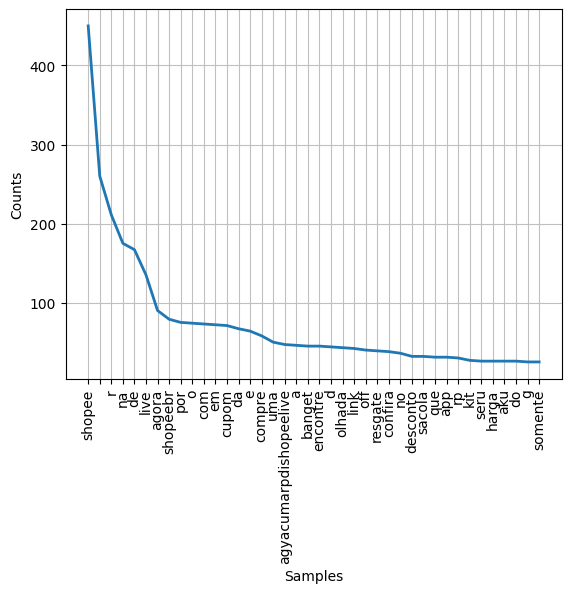

In [ ]:
freq_dist.plot(40,cumulative=False)
plt.show()

## SPLIT DATA

In [42]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import StackingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data into training and testing with test_size = 0.20 and random_state = 0
X_train, X_test, y_train, y_test = train_test_split(df['text_string'], df['sentiment'],
                                                    test_size=0.20,
                                                    random_state=0)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit TF-IDF vectorizer on training data and transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform testing data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert sparse TF-IDF matrices to dense arrays
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# Training base models
nb_model = GaussianNB()
rf_model = RandomForestClassifier(n_estimators=25, random_state=42)
base_models = [('nb', nb_model), ('rf', rf_model)]

# Training stacking model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(X_train_dense, y_train)

# Evaluating stacking model
stacking_predictions = stacking_model.predict(X_test_dense)
accuracy = accuracy_score(y_test, stacking_predictions)

print("Accuracy of the stacking model:", accuracy)
print(classification_report(y_test, stacking_predictions))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, stacking_predictions))


Accuracy of the stacking model: 0.8888888888888888
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         2
     positif       0.89      1.00      0.94        16

    accuracy                           0.89        18
   macro avg       0.44      0.50      0.47        18
weighted avg       0.79      0.89      0.84        18

Confusion Matrix:
[[ 0  2]
 [ 0 16]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **SAVE TO GDRIVE**

In [ ]:
df.to_csv("ofc_shopee_pres.csv", index=False)

In [ ]:
df.head()

,full_text,text_clean,baku,token,stop,stemmed
0,@ivanckak iya nih seru banget lho flash sale s...,ivanckak iya nih seru banget lho flash sale sh...,ivanckak iya nih seru banget lho flash sale sh...,"[ivanckak, iya, nih, seru, banget, lho, flash,...","[ivanckak, iya, nih, seru, banget, lho, flash,...","[ivanckak, iya, nih, seru, banget, lho, flash,..."
1,cukup di liat aja ya pls jangan beli,cukup di liat aja ya pls jangan beli,cukup di liat aja ya pls jangan beli,"[cukup, di, liat, aja, ya, pls, jangan, beli]","[cukup, liat, aja, pls, jangan, beli]","[cukup, liat, aja, pls, jangan, beli]"
2,comprei um monte de bobagem na shopee incluind...,comprei um monte de bobagem na shopee incluind...,comprei um monte de bobagem na shopee incluind...,"[comprei, um, monte, de, bobagem, na, shopee, ...","[comprei, um, monte, de, bobagem, na, shopee, ...","[comprei, um, monte, de, bobagem, na, shopee, ..."
3,COMPREI 7 PINS ESMALTADOS POR 20 REAIS NA SHOP...,comprei pins esmaltados por reais na shopee ...,comprei pins esmaltados por reais na shopee ht...,"[comprei, pins, esmaltados, por, reais, na, sh...","[comprei, pins, esmaltados, por, reais, na, sh...","[comprei, pins, esmaltados, por, reais, na, sh..."
4,@ivanckak gue aja udah dari tadi nungguin flas...,ivanckak gue aja udah dari tadi nungguin flash...,ivanckak gue aja udah dari tadi nungguin flash...,"[ivanckak, gue, aja, udah, dari, tadi, nunggui...","[ivanckak, gue, aja, udah, tadi, nungguin, fla...","[ivanckak, gue, aja, udah, tadi, nungguin, fla..."


In [ ]:
%cp -R /content/ofc_shopee_pres.csv /content/drive/MyDrive/Skripsi/Dataset/Hasil_preprosessing/twt/ofc_shopee_pres.csv